## Courant Number Sensitivity Analysis

Using the pointwise grid, the time step was halved to $1 \times 10^{-5}$, reducing the Courant number to a maximum of $\approx 1.8$ to investigate the effect this had on the simulation with regard to force coefficients and pressure frequency spectra.

In [2]:
# load libraries and set plot parameters
import numpy as np
import os
from scipy import signal
#import PrettyTable as pt
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Image

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


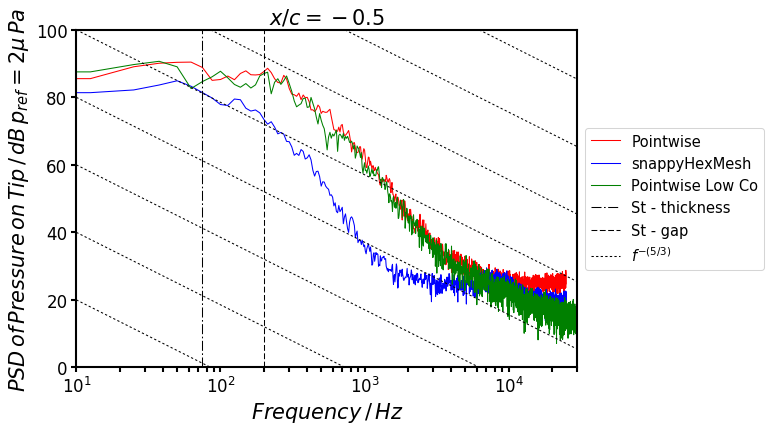

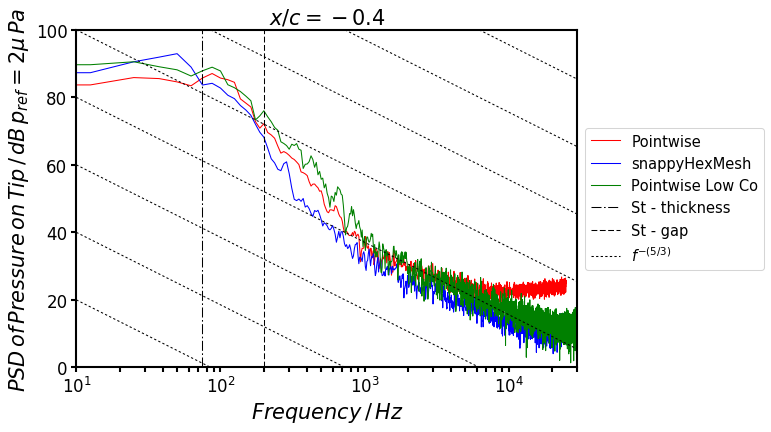

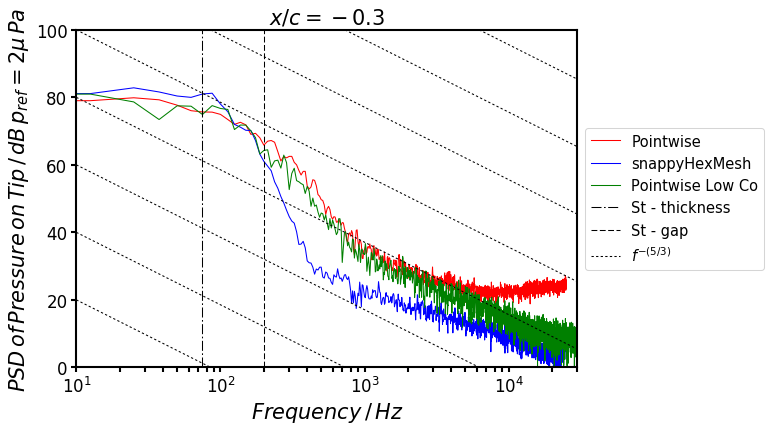

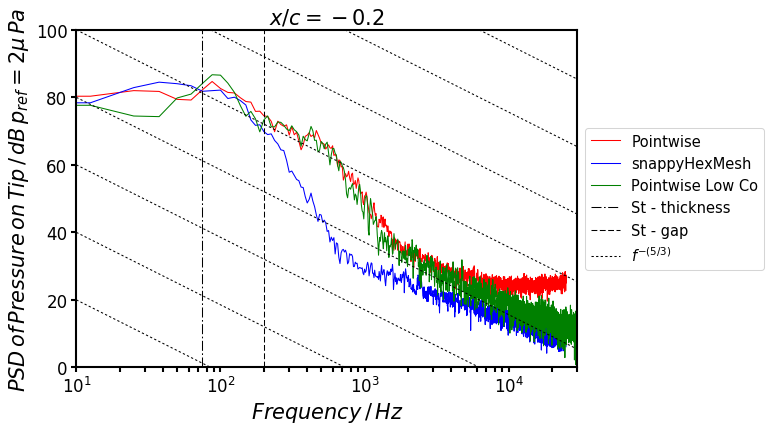

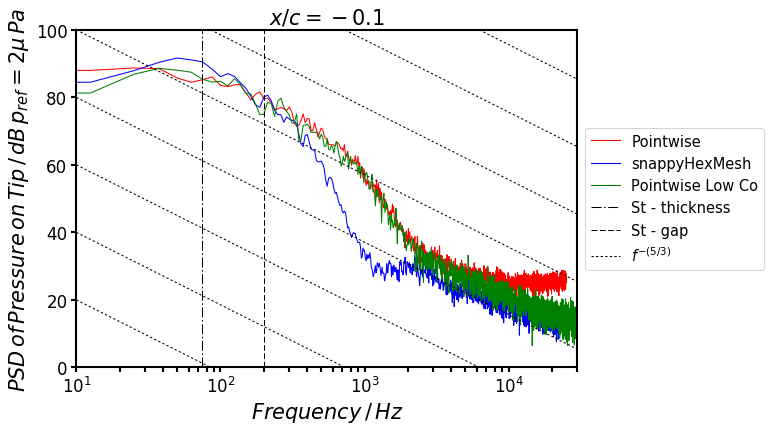

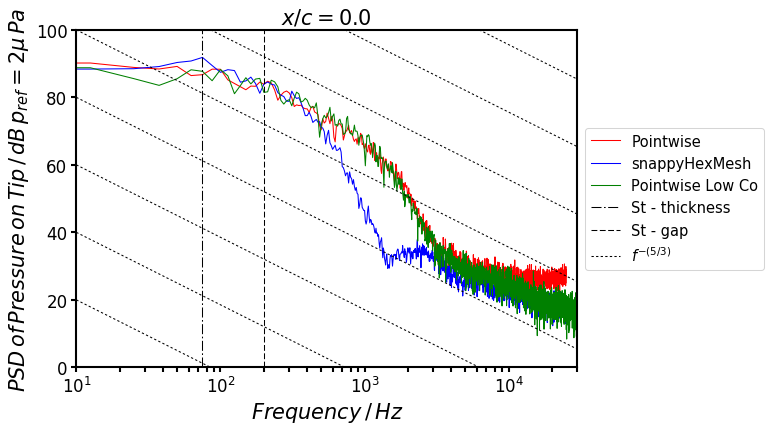

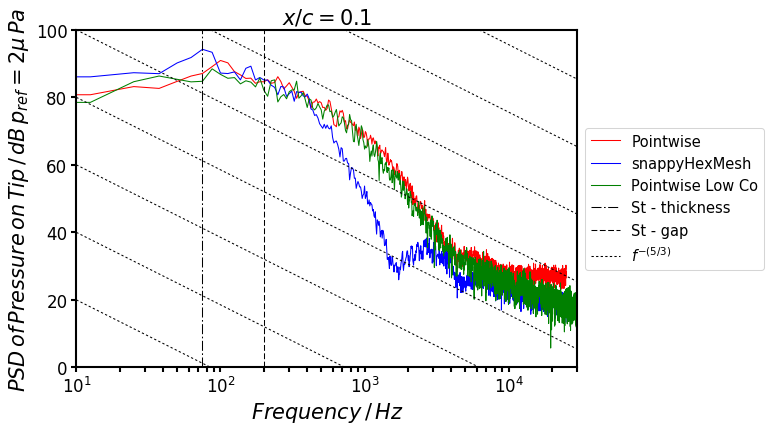

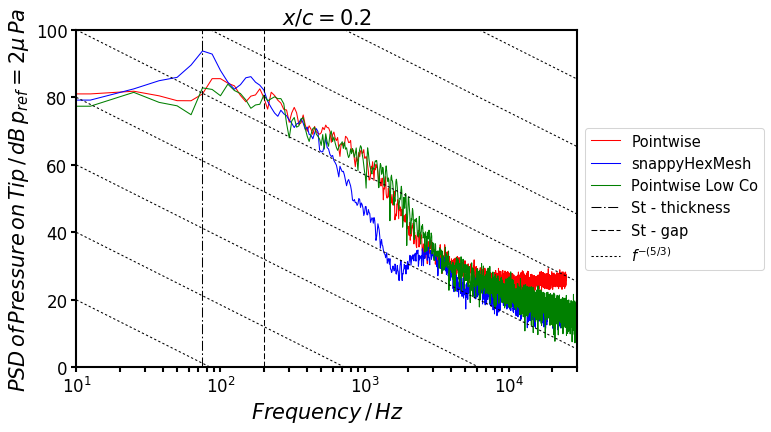

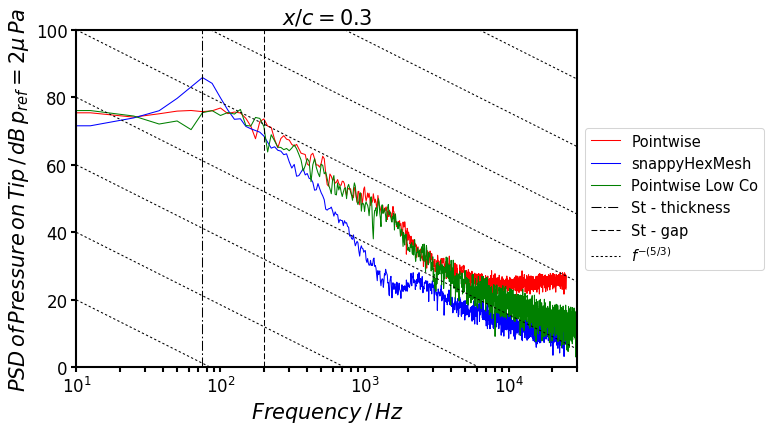

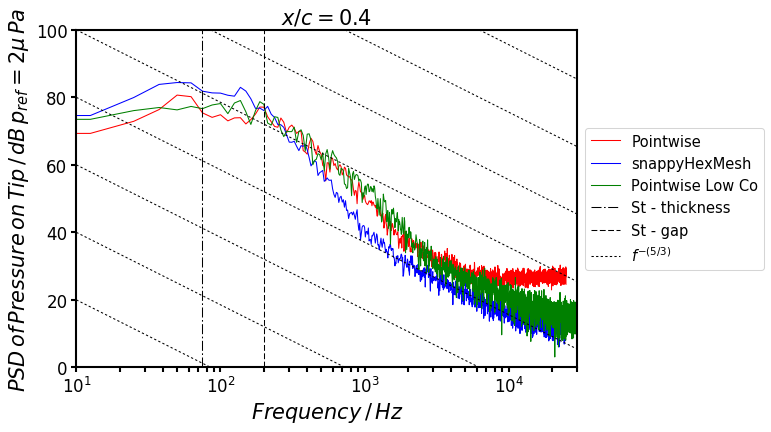

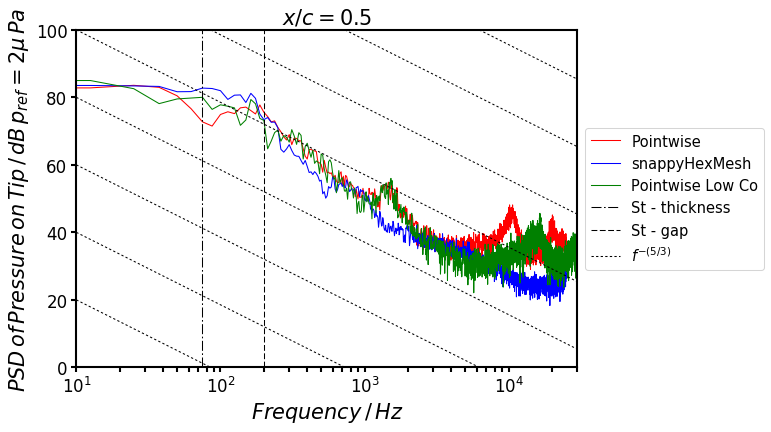

In [6]:
# Load data and calculate manipulations for PDF and PSD
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Friday 16th June 2017

@author: adamhiggens
"""

caselist = os.listdir('data_files')

pref = 2E-5
xmin = 10
xmax = 30000
nperseg = 4000

xrange = xmax-xmin
grad53 = -0.002488
grid_min = 20
d_grid = 20
n_grid = 8

n=0

p_PW_low = np.loadtxt('data_files/p_20075_lowCo.txt')
p_PW = np.loadtxt('data_files/p_20075.txt')
p_sHM = np.loadtxt('data_files/p_tipGap005.txt')

dT_PW_low = 1/(p_PW_low[1,0]-p_PW_low[0,0])
dT_PW = 1/(p_PW[1,0]-p_PW[0,0])
dT_sHM = 1/(p_sHM[1,0]-p_sHM[0,0])

for i in range(1,p_sHM.shape[1]):
# for i in range(1,2):
    
    freq_PW_low, fft_PW_low = signal.welch(p_PW_low[:,i], dT_PW_low, nperseg=2*nperseg)
    freq_PW, fft_PW = signal.welch(p_PW[:,i], dT_PW, nperseg=nperseg)
    freq_sHM, fft_sHM = signal.welch(p_sHM[:,i], dT_sHM, nperseg=nperseg)
    
    PSD_PW_low = 10*np.log10(fft_PW_low/pref**2)
    PSD_PW = 10*np.log10(fft_PW/pref**2)
    PSD_sHM = 10*np.log10(fft_sHM/pref**2)
    

    xcloc = (i-6.0)/10
    
    fig, ax = plt.subplots(1,figsize=(8,6))
    fig.canvas.set_window_title("Pressure Trace - x/c = "+str(xcloc))
    ax.tick_params(axis='both',reset=False,which='both',length=5,width=2)
    for spine in ['top', 'right','bottom','left']:
        ax.spines[spine].set_linewidth(2)
    fig.subplots_adjust(left=0.125, right=0.96, top=0.91, bottom=0.16)
    ax.set_title(r'${}$'.format('x/c = '+str(xcloc).replace(' ','\,')),fontsize=20)
    ax.set_xlabel(r'${}$'.format("Frequency / Hz".replace(' ','\,')),fontsize=20)
    ax.set_ylabel(r'${}$'.format("PSD of Pressure on Tip / dB p_{ref}=2\mu Pa".replace(' ','\,')),fontsize=20)
    tickFontProperties = matplotlib.font_manager.FontProperties(family='serif',
                      style='normal',weight='normal',size=16)

    ax.plot(freq_PW, PSD_PW,lw=1,ls='-',c='r', label='Pointwise')
    ax.plot(freq_sHM, PSD_sHM,lw=1,ls='-',c='b', label='snappyHexMesh')
    ax.plot(freq_PW_low, PSD_PW_low,lw=1,ls='-',c='g', label='Pointwise Low Co')
    #ax.plot(fft_PW_trimmed[:,0], PSD_PW_trimmed[:,i-1],lw=1,ls='--',c='b', label='Pointwise trimmed')
    #ax.plot(fft_sHM_trimmed[:,0], PSD_sHM_trimmed[:,i-1],lw=1,ls='--',c='g', label='snappyHexMesh trimmed')
    ax.plot([75,75],[0,100], ls='-.', c='k', label='St - thickness')
    ax.plot([200,200],[0,100], ls='--', c='k', label='St - gap')
    
    for i in range(n_grid):
        y0 = grid_min + i * d_grid
        y1 = xrange * grad53 + (grid_min + i * d_grid)
        
        if i == 0:
            ax.plot([xmin,xmax], [y0, y1], 'k:', label=r'${}$'.format('f^{-(5/3)}'))
        else:
            ax.plot([xmin,xmax], [y0, y1], 'k:')

    for label in ax.get_xticklabels() :
        label.set_fontproperties(tickFontProperties)
    for label in ax.get_yticklabels() :
        label.set_fontproperties(tickFontProperties)

    ax.set_xlim([xmin,xmax])
    ax.set_ylim([0,100])
    ax.set_xscale("log")
    ax.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

    #pylab.savefig('figures/PSD/P'+str(i)+'.png', bbox_inches='tight')

plt.show()




